# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# The MNIST (Modified National Institute of Standards and Technology) dataset is a benchmark dataset in the field of machine learning and computer vision. It originally consists of 60,000 grayscale images for training and 10,000 images for testing, each depicting handwritten digits from 0 to 9. Every image is 28x28 pixels in size, making it ideal for tasks like digit classification and image recognition. While the standard dataset is pre-divided into training and testing sets, in this project we have combined both and applied a custom 80/20 split. This approach ensures a more flexible and balanced partitioning of the data for model evaluation and training.

# Load default split from MNIST

In [2]:
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = mnist.load_data()

# Combine original train and test sets

In [3]:
X_full = np.concatenate((X_train_orig, X_test_orig), axis=0)
y_full = np.concatenate((y_train_orig, y_test_orig), axis=0)

# Splitting the dataset into 2 sets i.e. 80% in Training set and 20% in Testing set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42, stratify=y_full)

# Reading Dataset

In [5]:
data = pd.DataFrame(X_train.reshape(X_train.shape[0], -1))
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(56000, 784)

**Dataset contains 56000 rows and 784 columns**

# Understanding Data

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 41.9 MB


# ----------- Descriptive Statistics -----------

In [9]:
print("Descriptive Statistics for MNIST Dataset (Pixel Values):")
df_stats = pd.DataFrame(X_train.reshape(X_train.shape[0], -1))
print(df_stats.describe())

Descriptive Statistics for MNIST Dataset (Pixel Values):
           0        1        2        3        4        5        6        7    \
count  56000.0  56000.0  56000.0  56000.0  56000.0  56000.0  56000.0  56000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           8        9    ...           774           775           776  \
count  56000.0  56000.0  ...  56000.000000  56000.000000  56000.000000   
mean       0.0      0.0  ...      0.198304      0.103268      0.0

**Each column corresponds to a specific pixel, and the statistics—such as mean, standard deviation, minimum, maximum, and quartiles—reveal the distribution of values across all samples. Many pixels, especially those at the beginning and end (e.g., columns 0–7 and 783), have all-zero values, indicating inactive or consistently black pixels in those positions. However, several middle columns (like 774–779) show non-zero means and standard deviations, suggesting active pixels where digit strokes frequently appear.**

# Applying Models

# ----------- Machine Learning Models -----------

***Flatten and normalize images***

In [10]:
X_train_flat = X_train.reshape((X_train.shape[0], -1)) / 255.0
X_test_flat = X_test.reshape((X_test.shape[0], -1)) / 255.0

# 1. Random Forest

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_flat, y_train)
rf_pred = rf.predict(X_test_flat)
print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, rf_pred))


--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1381
           1       0.98      0.98      0.98      1575
           2       0.96      0.97      0.97      1398
           3       0.96      0.96      0.96      1428
           4       0.97      0.96      0.96      1365
           5       0.97      0.96      0.96      1263
           6       0.97      0.98      0.98      1375
           7       0.97      0.97      0.97      1459
           8       0.96      0.96      0.96      1365
           9       0.94      0.94      0.94      1391

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



# 2. SVM (Use a smaller subset for speed)

In [12]:
svm = SVC(kernel='linear')
svm.fit(X_train_flat[:10000], y_train[:10000])
svm_pred = svm.predict(X_test_flat)
print("\n--- SVM Classification Report ---")
print(classification_report(y_test, svm_pred))


--- SVM Classification Report ---
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1381
           1       0.93      0.98      0.95      1575
           2       0.90      0.91      0.90      1398
           3       0.88      0.89      0.88      1428
           4       0.92      0.92      0.92      1365
           5       0.87      0.87      0.87      1263
           6       0.96      0.95      0.95      1375
           7       0.92      0.93      0.93      1459
           8       0.91      0.83      0.87      1365
           9       0.89      0.87      0.88      1391

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



# ----------- Deep Learning Model (CNN) -----------

***Reshape and normalize images***

In [13]:
X_train_dl = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test_dl = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

***One-hot encode labels***

In [14]:
y_train_dl = to_categorical(y_train, 10)
y_test_dl = to_categorical(y_test, 10)

***Build CNN Model***

In [15]:
cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\utpal\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


***Compile and train***

In [16]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_dl, y_train_dl, epochs=5, batch_size=128, validation_split=0.1,verbose=1)

Epoch 1/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - accuracy: 0.8421 - loss: 0.5354 - val_accuracy: 0.9752 - val_loss: 0.0754
Epoch 2/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.9797 - loss: 0.0663 - val_accuracy: 0.9830 - val_loss: 0.0541
Epoch 3/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.9868 - loss: 0.0425 - val_accuracy: 0.9887 - val_loss: 0.0419
Epoch 4/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.9904 - loss: 0.0315 - val_accuracy: 0.9862 - val_loss: 0.0444
Epoch 5/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.9930 - loss: 0.0221 - val_accuracy: 0.9884 - val_loss: 0.0405


***Evaluate***

In [17]:
cnn_pred_probs = cnn.predict(X_test_dl)
cnn_pred = np.argmax(cnn_pred_probs, axis=1)
y_test_labels = np.argmax(y_test_dl, axis=1)

print("\n--- CNN Classification Report ---")
print(classification_report(y_test_labels, cnn_pred))

438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step

--- CNN Classification Report ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1381
           1       0.99      0.99      0.99      1575
           2       0.99      0.99      0.99      1398
           3       0.99      0.99      0.99      1428
           4       0.98      0.99      0.99      1365
           5       0.99      0.99      0.99      1263
           6       0.99      0.99      0.99      1375
           7       0.98      0.99      0.99      1459
           8       0.99      0.98      0.98      1365
           9       0.99      0.97      0.98      1391

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



**Each report includes performance metrics such as precision, recall, and f1-score for all ten-digit classes (0–9), along with the total number of test samples per class (support). The Random Forest model achieved an overall accuracy of 97%, showing consistent performance across most classes with f1-scores mostly around 0.96 to 0.98. The SVM model yielded a slightly lower accuracy of 91%, with comparatively lower precision and recall values, particularly for digits like 4, 5, and 9, indicating it struggled more with these. In contrast, the CNN model outperformed both, achieving an impressive 99% accuracy, with near-perfect precision, recall, and f1-scores across all digit classes.**

# Bar Graph to compare the accuracy of different models

**Calculate accuracy scores**

In [18]:
accuracy_rf = accuracy_score(y_test, rf_pred)
accuracy_svm = accuracy_score(y_test, svm_pred)
accuracy_cnn = accuracy_score(y_test_labels, cnn_pred)

**Model names and their accuracies**

In [19]:
model_names = ['Random Forest', 'SVM', 'CNN']
accuracies = [accuracy_rf, accuracy_svm, accuracy_cnn]

**Plot the bar chart**

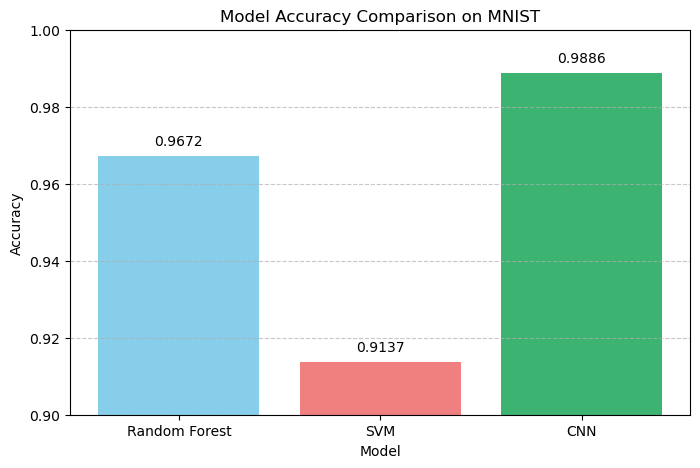

In [20]:
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'mediumseagreen'])
plt.ylim(0.9, 1.0)
plt.title('Model Accuracy Comparison on MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Add value labels on top of bars

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.002, f'{height:.4f}', ha='center', va='bottom')

plt.show()

**The performance of different models are clearly illustrated in the accuracy comparison graph, which visually highlights the superior performance of the CNN model over Random Forest and SVM, making it the most effective approach for handwritten digit recognition on the MNIST dataset.**